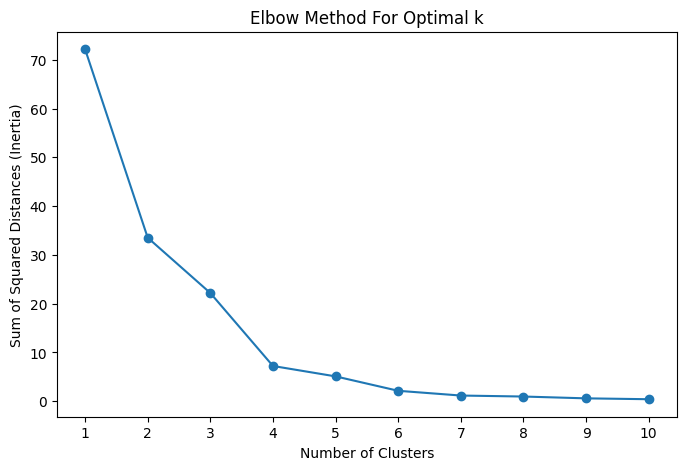

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# import timeslice csv
df = pd.read_csv("/content/timeslice_test.csv")

df.head()

# show clustering of temperature using K-means
temperature = np.array(df['RmTemp'])
target = np.array(df['RmTemp'])

#source_file = np.array(df['source_file'])
X = []#list to hold the data point locations

for i in range(len(temperature)):
  x1 = temperature[i]
 #x2 = source_file[i]
  X.append([x1])#only gets the data that we want to use

# Calculate inertia for different values of k (number of clusters)
sse = []  # Sum of squared distances
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.title("Elbow Method For Optimal k")
plt.xticks(k_range)
plt.show()

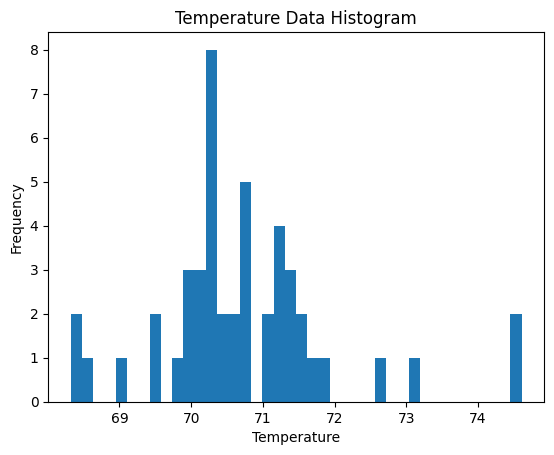

In [9]:
# histogram of the temperature data
plt.hist(temperature, bins=40)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Data Histogram')
plt.show()

Sensor 1: Temperature = 69.9°C, Cluster = 0
Sensor 2: Temperature = 70.65666667°C, Cluster = 0
Sensor 3: Temperature = 70.28333333°C, Cluster = 0
Sensor 4: Temperature = 70.21333333°C, Cluster = 0
Sensor 5: Temperature = 70.82°C, Cluster = 0
Sensor 6: Temperature = 70.22°C, Cluster = 0
Sensor 7: Temperature = 70.33°C, Cluster = 0
Sensor 8: Temperature = 70.37666667°C, Cluster = 0
Sensor 9: Temperature = 69.92°C, Cluster = 0
Sensor 10: Temperature = 68.57333333°C, Cluster = 2
Sensor 11: Temperature = 70.12°C, Cluster = 0
Sensor 12: Temperature = 70.27°C, Cluster = 0
Sensor 13: Temperature = 71.43666667°C, Cluster = 1
Sensor 14: Temperature = 70.27333333°C, Cluster = 0
Sensor 15: Temperature = 70.76666667°C, Cluster = 0
Sensor 16: Temperature = 70.16333333°C, Cluster = 0
Sensor 17: Temperature = 71.13°C, Cluster = 1
Sensor 18: Temperature = 70.14666667°C, Cluster = 0
Sensor 19: Temperature = 68.47°C, Cluster = 2
Sensor 20: Temperature = 69.49333333°C, Cluster = 0
Sensor 21: Temperature =

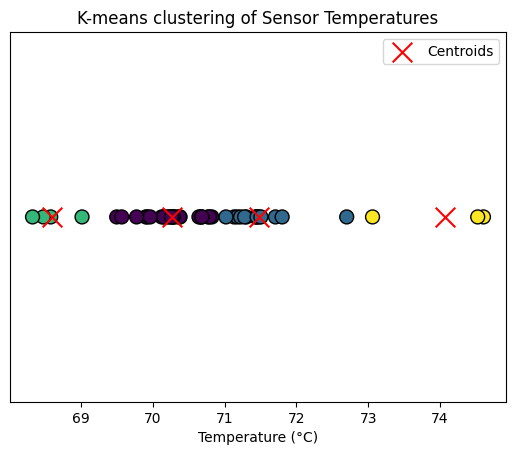

In [19]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# k means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(temperature.reshape(-1, 1)) # Reshape temperature array to 2D

# cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i, temp in enumerate(temperature.flatten()):
    print(f"Sensor {i+1}: Temperature = {temp}°C, Cluster = {labels[i]}")

# Visualize (optional, but helpful)
plt.scatter(temperature, np.zeros_like(temperature), c=labels, cmap='viridis', s=100, edgecolors='black')
plt.scatter(centroids[:,0], np.zeros_like(centroids[:,0]), c='red', s=200, marker='x', label='Centroids') #Access the first column of centroids for plotting
plt.xlabel("Temperature (°C)")
plt.title("K-means clustering of Sensor Temperatures")
plt.yticks([])
plt.legend()
plt.show()
